<a href="https://colab.research.google.com/github/jansoe/BootstrapPrediction/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.  Einführung in die Bildklassifikation mit neuronalen Netzen.

Nachdem wir im letzten Aufgabenblatt die Grundlagen der Bildbearbeitung kennengelernt haben, wenden wir uns diese Woche den künstlichen neuronalen Netzen zu. Wir beginnen mit dem einfachsten Netz, dem sogenannten `Perzeptron` mit nur einer Zelle bzw. einem abstrakten Neuron, und arbeiten uns im Schnelldurchlauf durch die Geschichte der neuronalen Netze, um am Ende `Transfer Learning` auf ein riesiges Deep Learning-Modell anzuwenden. 

Das Verfahren ist wie gehabt:
- Erstellen Sie eine Kopie dieses Notebooks in ihrem Google Drive (vorgeschlagene Umbenennung: "A2 - Vorname, Nachname")
- Editieren Sie die Text- und Codezellen.
- Teilen Sie Ihr Notebook mit uns

---

## 2.0 Das Perzeptron

Das [Perzeptron](https://de.wikipedia.org/wiki/Perzeptron) wurde 1958 von Frank Rosenblatt vorgestellt und ist in seiner urprünglichen Form das einfachste künstliche neuronale Netz. Es besteht aus einem einzelnen *künstlichen Neuron*, das seine gewichteten Inputs aufsummiert und mit einem Schwellenwert verrechnet. Das Perzeptron *lernt* Datenpunkte zu kategorisieren durch die Anpassung der Gewichtungen seiner Eingänge. 

Dieser aus heutiger Sicht einfach zu berechnende Algorithmus überforderte die Computer der damaligen Zeit, so dass eine Hardwareimplementierung gebaut werden musste. 

![Perzeptron Mark I](https://upload.wikimedia.org/wikipedia/en/thumb/5/52/Mark_I_perceptron.jpeg/220px-Mark_I_perceptron.jpeg)
Perzeptron Mark I, [https://en.wikipedia.org/wiki/Perceptron](https://en.wikipedia.org/wiki/Perceptron)



Im Folgenden werden wir ein Perzeptron mit zwei Eingängen/Inputs von Grund auf implementieren und die Funktionsweise des *Lernens* grafisch darstellen. 

Die Bestandteile, also die Gewichtung der Inputs und die Anwendung des Schwellenwerts, werden oft als verbundene Kreise dargestellt.

![image.png](https://drive.google.com/uc?id=1pWzsbDNSQmrvrPokKiPbDnaTWmfa534Q)

Mathematisch besteht das Perzeptron aus den Gewichten $\omega$ und dem Schwellenwert $\theta$. Um das Perzeptron auf einen zweidimensionalen Punkt mit den Werten $x_0$ und $x_1$ anzuwenden, werden die Gewichte $\omega_0$ und $\omega_1$ jeweils mit den zugehörigen $x$-Werten multipliziert. Ist die Summe der beiden Produkte größer als $-\theta$, ist der Ausgang $y$ des Perzeptrons $1$. Der durch $x_0$ und $x_1$ beschriebene Punkt wird entprechend der Kategorie $1$ zugeordnet. Andernfalls ist der Ausgang $0$ und der Punkt fällt in die Kategorie $0$. Etwas formeller ist die Ausgabe $y$ wie folgt definiert:

\begin{equation}
y = \begin{cases}1 &wenn&  x_0\omega_0+x_1\omega_1+\theta > 0 \\ 0&wenn&  x_0\omega_0+x_1w_1+\theta \leq 0\end{cases}
\end{equation}

Das Perzeptron unterteilt den Raum damit in zwei Regionen: Eine mit der Ausgabe $0$ und eine mit der Ausgabe $1$. Dazwischen liegt die `Trennebene`.

Bevor wir das Perzeptron als Funktion definieren, importieren wir einige Bibliotheken, die wir im weiteren Verlauf benötigen werden.

In [ ]:
# Hier werden notwendige Bibilotheken importiert.
import time
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,8)
rcParams['axes.grid'] = False

Nun definieren wir eine Funktion, die die Berechnungen für ein Perzeptron umsetzt:

In [ ]:
def perceptron(input, w0, w1, theta):
    state = input[0]*w0 + input[1]*w1 + theta
    output = state>0
    return output

Um die Funktionsweise dieses Algorithmus zu illustrieren, benötigen wir einen Datensatz. Hierzu erzeugen wir ein paar zufällig verteilte Punkte und unterteilen diese dann in zwei Klassen, ähnlich wie beim k-means-Algorithmus, den Sie in A0 kennengelernt haben. In Machine-Learning-Kreisen bezeichnet man sowas als *Toy-Datensatz*.

In [ ]:
# Parameter für die Toy-Daten
n_datenpunkte = 30 # Anzahl der Punkte
separation = 1     # Abstand zwischen den Klassen
random_seed =  23  # Hiermit bestimmen wir den Zufall 

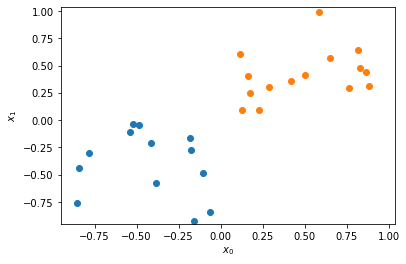

In [ ]:
#@title Bitte ausführen: Code zum Generieren und Anzeigen des zufälligen Datensatzes

# In Anhängigkeit der oberen Parameter generieren wir hier den Datansazt
# und zeigen diesen zusätzlich an
np.random.seed(random_seed)

data = np.random.rand(n_datenpunkte,2)
targets = 1.*(np.random.rand(n_datenpunkte)<0.5)
data[targets==1] += separation

data -= data.mean(axis=0)
# plotten, um zu sehen, ob alles gut gelaufen ist.
# es ist hilfreich, eine Funktion für das Plotten der Daten zu schreiben,
# da wir dies noch oft tun werden
def plot_data(data,targets):
    
    plt.plot(data[targets==0,0],data[targets==0,1],'o')
    plt.plot(data[targets==1,0],data[targets==1,1],'o')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    minval = data.min()
    maxval = data.max()
    lim = [0.95*minval,1.05*maxval]
    
    plt.ylim(lim)
    plt.xlim(lim)
    return lim
    
# jetzt wird die funktion ausgeführt
_ = plot_data(data,targets)
# ist der datensatz linear separierbar?

Wir wählen zunächst zufällige Parameter für unser Perzeptron und stellen die dadurch entstehende Trennebene dar.

In [ ]:
random_seed = 1005
np.random.seed(random_seed)

# Gewichte
w0 = np.random.rand()-0.5
w1 = np.random.rand()-0.5
# Schwellenwert
theta = 0

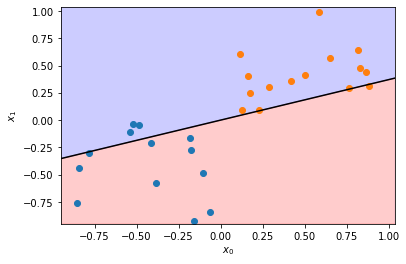

In [ ]:
#@title Bitte ausführen: Code zum Darstellen der Trennebene

import matplotlib

def plot_boundary(w0, w1, theta, lim, **kwargs):
    """ plot the decision boundary paramterized by w and theta within the bounds
        of a square described by lim."""
    
    if (w0==0) and(w1==0):
        #  keine trennebene...
        return 
    elif w1 == 0:
        # senkrecht
        x0 = [-theta/w0]*2
        x1 = [lim]
    
    else:
        x0 = lim
        x1 = [(-x*w0 - theta)/w1 for x in x0]
    
    plt.plot(x0, x1, 'k', **kwargs)
    plt.xlim(lim)
    color1 = 'b' if w0 > w1 else 'r'
    color2 = 'r' if color1 == 'b' else 'b'
    area_0 = matplotlib.patches.Polygon(
        [(x0[0], x1[0]), (x0[1], x1[1]), 
         (x0[1], x0[0]), (x0[0], x0[0]), 
         (x0[0], x1[1]),  (lim[0], lim[1]),
         ],
        alpha=0.2, color=color2
    )
    area_1 = matplotlib.patches.Polygon(
        [(x0[1], x0[1]), (x0[0], x0[1]), (x0[0], x1[0]), 
         (x0[1], x1[1]), (lim[1], lim[0]), (x0[1], x1[0])],
        alpha=0.2, color=color1
    )
    plt.gca().add_patch(area_0)
    plt.gca().add_patch(area_1)


plt.figure()
lim = plot_data(data, targets)
_ = plot_boundary(w0,  w1, theta, lim)

### Die Optimerung

Die initiale Position der Trennebene im Datenraum ist zufällig gewählt. Die Optimierung kann beginnen. 
Die Optimierung der Parameter $w_0$, $w_1$ und $\theta$ erfolgt *iterativ*. Das heißt, die Gewichte werden in kleinen Schritten verändert, bis die gewünschte Ausgabe für alle Trainingsdatenpunkte erreicht ist. In jedem Trainingsschritt $k$ wird zu den Gewichten ein `update` $\Delta w$ hinzugefügt. 
\begin{equation}
w^{k+1} = w^k + \Delta w
\end{equation}
$\Delta w$ ergibt sich aus einer `Lernregel`. Die Perzeptronlernregel besagt:
\begin{equation}
\Delta w = \alpha (t-o)x
\end{equation}
$\alpha$ ist die *Lernrate* und bestimmt die Größe des Gewichtsupdates. $t$ (targets) ist die gewünschte Ausgabe, $o$ (output) die tatsächliche Ausgabe des Neurons und $x$ ist der Input. 
Das Gewichtsupdate im Schritt $k$ verläuft also wie folgt:

\begin{equation}
w^{k+1} = \begin{cases} w^k & \text{bei korrekter Ausgabe} \\
w^k + \alpha x & \text{falls } o=0 \text{ und } t=1 \\
w^k - \alpha x & \text{falls } o=1 \text{ und } t=0 
\end{cases}
\end{equation}

Dieses Verfahren wird so lange wiederholt, bis alle Punkte richtig klassifiziert werden oder bis eine maximale Anzahl von Iterationen erreicht ist.

---
**Anmerkungen**

Der Schwellenwert $\theta$ kann zur Vereinfachung als ein drittes Gewicht behandelt werden, dessen Input immer $1$ beträgt und das gemeinsam mit den anderen beiden während der Optimierung angepasst wird.

In [ ]:
np.random.seed(1005)

# Parameter der Optimierung
lernrate = 0.05 # bestimmt die größe der Gewichtsveränderung
max_iteration = 100 # Maximale anzahl von Iterationen die ausgeführt werden

In [ ]:
#@title Bitte ausführen: Code zum Anzeigen der Ausgabe

from google.colab import widgets
import time

class TrennebenenPlotter():

    def __init__(self, data, targets, w0, w1, theta):

        self.data = data
        self.targets = targets
        self.w0_old = w0
        self.w1_old = w1
        self.theta_old = theta


    def plot_update(self, datenpunkt, w0, w1, theta):
        
        plt.figure()
        lim = plot_data(self.data, self.targets)
        plot_boundary(w0, w1, theta, lim)
        plot_boundary(self.w0_old, self.w1_old, self.theta_old, lim, alpha=0.2)

        plt.plot(datenpunkt[0], datenpunkt[1], 'or', markersize = 10, mfc='none')
        plt.title('iteration '+str(iteration))

        # wir speicher die alten Werte um das update spaeter zu visualisieren
        self.w0_old = w0
        self.w1_old = w1
        self.theta_old = theta

vis = TrennebenenPlotter(data, targets, w0, w1, theta)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

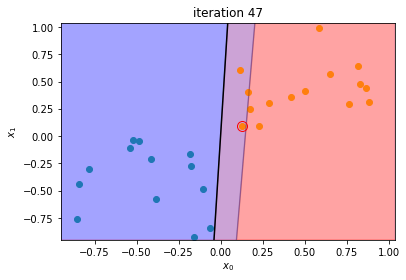

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
#@title Bitte ausführen: Code zum Trainieren der Gewichte
grid = widgets.Grid(1, 1, header_row=False, header_column=False)
wait_time = 4 # Zeit zwischen 2 Schritten für die Anzeige

iteration  = 0 # Tracking der Schritte in unserer Optimierung
for i in range(max_iteration):
    iteration += 1

    # wähle den nächsten Datenpunkt
    datenpunkt = data[iteration%len(data)]
    gewueschter_output = targets[iteration%len(data)]

    # berechne den Output
    perceptron_output = perceptron(datenpunkt, w0, w1, theta)

    # und vegleiche ihn mit dem gewünschten Output
    fehler = gewueschter_output - perceptron_output 

    if fehler != 0:
        # schiebe die Parameter (Trennebene) ein Stück in Richtung des falsch
        # kategorisierten Punkts
        w0 = w0 + lernrate * fehler * datenpunkt[0]
        w1 = w1 + lernrate * fehler * datenpunkt[1]   
        theta = theta + lernrate * fehler

        with grid.output_to(0, 0):
            grid.clear_cell()
            vis.plot_update(datenpunkt, w0, w1, theta)
        time.sleep(wait_time)

### 2.0.0 Hohe Lernrate
Was geschieht, wenn Sie einen vergleichsweise großen Wert für die Lernrate einstellen?

 <bitte hier ausfüllen>

---

### 2.0.1 Niedrige Lernrate
Was geschieht, wenn Sie einen vergleichsweise kleinen Wert für die Lernrate einstellen?

 <bitte hier ausfüllen>

---

## 2.1 Ein einfaches Netzwerk

Im vorherigen Abschnitt haben Sie eine Intuition dafür vermittelt bekommen, wie ein künstliches Neuron funktioniert und was in diesem Kontext mit *Lernen* gemeint ist. 

Um komplexere Probleme lösen zu können, benötigt man komplexere Modelle. Dazu werden im Prinzip nur viele dieser einfachen Zellen (*Units*) zu größeren Netzwerken verknüpft. Die Optimierung der Parameter besteht auch hier darin, die Gewichte in kleinen Schritten so anzupassen, dass die Abweichung von der gewünschten Ausgabe minimiert wird. Die technischen Details werden hier allerdings sehr schnell ziemlich komplex. Damit wir uns um diese nicht weiter kümmern müssen, verwenden wir für die folgenden Netzwerke die `Keras`-API von Googles `Tensorflow`-Paket (in der neueren Version 2).

In [ ]:
%tensorflow_version 2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf

Auch werden die Punktewolken aus Abschnitt 2.0 schnell langweilig. Wir laden deshalb wieder den anschaulichen `MNIST`-Datensatz herunter, den Sie ja bereits aus A1 kennen. 

Zusätzlich ändern wir dieses Mal noch die Skalierung der Pixelwerte. Neuronale Netze arbeiten in der Regel mit Wertebereichen zwischen -1 und 1.


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# wir skalieren unsere grauwerte auf -1 bis 1 
train_images = (train_images/255 - 0.5) * 2
test_images = (test_images/255 -0.5) * 2

11493376/11490434 [==============================] - 0s 0us/step


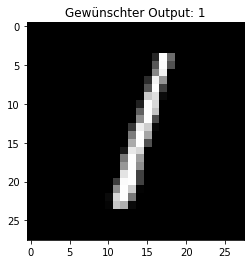

In [ ]:
_ = plt.imshow(test_images[2], cmap=plt.cm.gray)
_ = plt.title('Gewünschter Output: %s'%test_labels[2])

In [ ]:
train_images.shape

(60000, 28, 28)

Der Datensatz enthält 60.000 Beispiele handgeschriebener Ziffern, auf denen wir nun ein einfaches Netzwerk trainieren können. Weitere 10.000 Bilder können zum Testen des Trainingserfolgs (performance, accuracy) verwendet werden. 

Im einfachsten Fall konstruieren wir für jede Ziffer im Datensatz - also für jede *Klasse* oder *Kategorie* - ein einzelnes Perzeptron. Jede dieser Zellen wird dann auf das binäre Klassifikationsproblem trainiert, *seine* Zahl von allen anderen zu unterscheiden. 

Die zweidimensional angeordneten 28x28 Pixel werden für die Verwendung als Eingabe des neuronalen Netzes zunächst in eindimensionale Vektoren mit 784 Werten umgeformt.

In [ ]:
# 2D-Bilder werden zu 1D-Vektoren umgeformt.
train_images_flat = train_images.reshape((60000, 784))
test_images_flat = test_images.reshape((10000, 784))

train_images_flat.shape

(60000, 784)

Wir können nun das Netzwerk konstruieren. In `Keras` ist eine Schicht von Zellen, die jeweils mit sämtlichen Units der Eingabeschicht verbunden sind, in der Klasse `Dense` aus dem Modul `layers` implementiert. 

Als Parameter übergeben wir der Klasse die Anzahl der Units (eine pro Ziffer, also 10 insgesamt), die Form (shape) der Eingabe (784,) und die Aktivierungsfunktion. Im Perzeptronbeispiel von Abschnitt 2.0 war die Aktivierungsfunktion ein einfacher Schwellenwert. Hier wählen wir die Funktion `softmax`. Diese stellt sicher, dass die Ouputs des Netzwerkes in der Summe 1 ergeben und so als Wahrscheinlichkeiten interpretiert werden können. Zusätzlich kann der Schicht optional ein Name gegeben werden.




In [ ]:
# Ein Dense Layer ist eine sogenannte all-to-all Verknüpfung von Eingabe- und Ausgabeneuronen
out_layer = tf.keras.layers.Dense(
    input_shape=(784,),            # Der input: Grauwerte sämtlicher Pixel. 
    units=10,                      # 10 units als output.
    activation='softmax',          # Die softmax-Aktivierung stellt sicher, das die Summe aller Ausgabeneurone 1 ergibt
    name = 'output'
)

Die so parametrisierte Schicht können wir in Keras nun zu einem Modell zusammensetzen. 

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(out_layer)

Ein solches Modell kann mit der Funktion `plot_model` visualisiert werden. Der Input wird von Keras als zusätzliche Schicht angezeigt. 

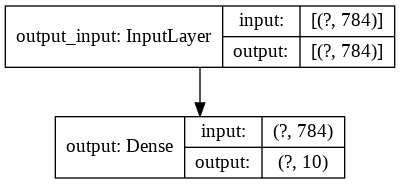

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________



Damit das Modell trainiert werden kann, muss Keras noch mitgeteilt werden, was optimiert werden soll. In unserem Fall, der sogenannten `multiclass-classification`, benutzt man hier die `sparse_categorical_crossentropy`. Mit dem Parameter `metrics` kann noch ein Fehlermaß angegeben werden, das während des Trainings auf einem Validierungsdatensatz berechnet wird. Dies dient dem Zweck, während des Trainings beobachten zu können, was sich tut.

In [ ]:
model1.compile(
    # Klassifizierungsfehler
    loss = 'sparse_categorical_crossentropy',
    # Fehlermaß - nur für uns zum Beobachten des Trainings. Gibt Anteil korrekt
    # klassifizierter Samples des Validierungsdatensatzes an.
    metrics = ['accuracy']                     
)

Mit der Methode `fit` wird das Modell nun trainiert. Hierfür übergeben wir die annotierten Trainingsdaten als Paramter `x` (Eingabewerte), die gewünschte Ausgabe als Parameter `y` sowie die Testdaten als Parameter `validation_data`, um während des Trainings die `accuracy` angezeigt zu bekommen. Der Paramter `epochs` bestimmt, wie häufig die Optimierung über den gesamten Datensatz durchgeführt werden soll.

In [ ]:
model1.fit(
    x = train_images_flat, 
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20  # Eine Epoche ist abgeschlossen, wenn alle Datenpukte einmal trainiert wurden.
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4360 - accuracy: 0.8715 - val_loss: 0.3043 - val_accuracy: 0.9134
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3298 - accuracy: 0.9040 - val_loss: 0.3224 - val_accuracy: 0.9047
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.9101 - val_loss: 0.3065 - val_accuracy: 0.9107
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.9119 - val_loss: 0.3074 - val_accuracy: 0.9142
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9147 - val_loss: 0.3062 - val_accuracy: 0.9135
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3001 - accuracy: 0.9152 - val_loss: 0.3295 - val_accuracy: 0.9077
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.9155 - val_loss: 0.2937 - val_accuracy:

Die Optimierung läuft für einige Zeit und pendelt sich bei einer Performance von ca. 92% richtiger Antworten ein. Wenn man bedenkt, dass für jede Kategorie lediglich ein einzelnes Ausgabeneuron die 784 Graustufen eines Bildes auswertet, ist dies schon beachtlicht.

Um die Leistungsfähigkeit zu erhöhen, müssen wir das Netzwerk jedoch komplexer machen. 

## 2.2 Getting Deeper  

Die Komplexität, die ein einschichtiges neuronales Netz erfassen kann, ist relativ begrenzt. Durch das Hinzufügen weiterer Schichten zwischen Output und Input können jedoch theoretisch beliebig komplexe Zusammenhänge gelernt werden. Diese zusätzlichen Schichten werden `hidden layers` genannt, da ihre Aktivität von außen betrachtet dem Anwender verborgen bleibt. 

Wir konstruieren jetzt also ein weiteres Netzwerk, diesmal mit einer *hidden layer* bestehend aus 200 Zellen. Diese verstecke Schicht dient dazu, bestimmte Muster und Merkmale aus den Daten zu lernen, die dann von der Ausgabeschicht besser interpretiert werden können. Für diese Art von Schicht hat sich die Aktivierungsfunktion [`relu`](https://de.wikipedia.org/wiki/Rectifier_(neuronale_Netzwerke)) etabliert. 


In [ ]:
hidden_layer = tf.keras.layers.Dense( 
    input_shape = (28*28,), 
    units=200,  # 200 units als Zwischen-Output
    activation = 'relu',  # Die Standardaktivierungsfunktion bei modernen neuronalen Netzen
    name = 'hidden'
) 

Die Ausgabeschicht ist für dieses Klassifizierungsproblem immer die gleiche wie in unserem ersten Modell - also ein Perzeptron pro Klasse.

In [ ]:
# unser outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      # 10 units als Output
    activation='softmax',           # Die Softmax-Aktivierung fuer Klassifikation 
    name= 'out'
)

Aus diesen Schichten können wir das zugehörige Modell aufbauen. Hier sehen wir nun den eigentlichen Zweck der `Sequential`-Klasse: Mit der Methode `add` können beliebige Keras-Layers zu einem Modell hinzugefügt werden.

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(hidden_layer)
model2.add(out_layer)

model2.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy'],  # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.summary()

In [ ]:
model2.fit(
    x = train_images_flat, 
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20   # Eine Epoche ist abgeschlossen, wenn alle Datenpukte einmal trainiert wurden
)

Das Hinzufügen der *hidden layer* hat uns also von 92% auf über 97% Klassifikationsgenauigkeit gebracht. 

### 2.2.0 Einfluss der Größe der versteckten Schicht


Verändern Sie den Code so, dass die *hidden Layer* einmal 20 und einmal 1000 units hat. Welchen Einfluss hat dies auf Trainings- und Validierungsgenauigkeit?


<bitte hier ausfüllen>

---

### 2.2.1 Einfluss der Anzahl an versteckten Schichten

Konstruieren Sie ein Netzwerk mit zwei inneren (versteckten) Schichten. Welchen Einfluss hat dies auf Trainings- und Validierungsgenauigkeit? Experimentieren sie mit der Anzahl der Units in den Schichten. Was ist die höchste Validierungsgenauigkeit, die Sie so erreichen können?

<bitte hier ausfüllen>

---

## 2.3 Faltungsnetzwerke (convolutional networks)

Jeden Neuron in unserem Gehirn wird nur durch (mehr oder weniger) spezifische Stimuli aktiviert. Bei der Untersuchung visueller Stimuli wurde hierfür der Begriff der *rezeptiven Felder* geprägt.

Technisch lässt sich ein solche Funktionalität als *Filter* realisieren, also als eine Kombination von Gewichten, die auf bestimmte *Merkmale* wie Punkte oder Kanten in einer bestimmten Ausrichtung besonders stark reagieren. Da solche *Merkmale* an sämtlichen Orten im Sichtfeld auftauchen können, ähneln die rezeptiven Felder biologischer Neuronen oft einander, decken jedoch bezogen auf das Sichtfeld unterschiedliche Bereiche ab. 

In Vorlesung 1 haben Sie das Konzept der Faltung und die Anwendung von Filtern auf Bilddaten kennengelernt. In Faltungsnetzwerken, die auch im deutschsprachigen Raum ausschließlich als *convolutional networks* bezeichnet werden, wird dieses Prinzip ausgenutzt: Einige wenige Filter werden über das gesamte Bild *geschoben*. Daher wird jede Filterfunktion - jeder Kernel - nur einmal benötigt. Dies reduziert den Speicherbedarf des Modells und beschleunigt dessen Berechnung dramatisch.

![Förderprogramm LINK der Stiftung Niedersachsen - Aufgabensammlung 1](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif) https://github.com/vdumoulin/conv_arithmetic

Bei die Optimierung des Modells werden die Form der einzelnen Filter und deren Gewichtungen in der anschließenden Schicht wieder anhand von Trainingsdaten gelernt.

Wir konstruieren nun ein Netzwerk mit acht verschiedenen Filtern der Größe 7x7. Jetzt wird also die räumliche Information in den Bildern erhalten, und wir verwenden die Bilder in ihrer ursprünglichen Form von 28x28 Pixeln.

In [ ]:
input_layer = tf.keras.layers.Conv2D(
    input_shape = (28, 28, 1),    # Unsere Input-Bildgröße inkl. einem Farbkanal
    filters = 8,                  # wieviel verschiedene Filter wir lernen
    kernel_size = (7,7),          # Filtergröße
    activation= 'relu'
)

Der Output dieser Schicht ist jedoch nun auch zweidimensional und muss für die anschließende Schicht wieder auf eine Dimension reduziert werden, da die Klasse `Dense` nur mit eindimensionalen Inputs arbeitet. Hierfür gibt es in Keras die Klasse `Flatten`. 

In [ ]:
flatten_layer = tf.keras.layers.Flatten()

Die Output-Schicht ist wie bei den vorangegangenen Modellen. 

In [ ]:
# Unsere outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      # 10 units als Output
    activation='softmax',          # Die Softmax-Aktivierung zur Klassifikation 
    name = 'out'
)

In [ ]:
model3 = tf.keras.models.Sequential()

model3.add(input_layer)
model3.add(flatten_layer)
model3.add(out_layer)

model3.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy'],                    
)

tf.keras.utils.plot_model(model3, show_shapes=True)

Da die `Conv2D`-Schicht in Keras für das Arbeiten mit echten Bilddaten konzipiert ist und diese in der Regel mehrere Farbkanäle besitzen, erwartet Keras hier, dass die Bilder eine weitere Dimension haben. Diese wird den Bildern hier hinzugefügt:


In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


Und schließlich kann unser Faltungsnetz trainiert werden.

In [ ]:
model3.fit(
    x = train_images, 
    y = train_labels,
    validation_data = (test_images, test_labels),
    epochs = 20   # Eine Epoche ist abgeschlossen, wenn alle Datenpukte einmal trainiert wurden
)

### 2.3.0 Verschiebung von Bildern

Mit ca. 98% Klassifikationsgenauigkeit bringt die Convolution auf diesem Datensatz kaum einen Vorteil. Der Grund ist, dass die Ziffern im MNIST-Datensatz zentriert sind. Dass heißt, Verschiebungen der Merkmale im Bild kommen so gut wie nicht vor. In natürlichen Bildern ist dies aber der Fall. Um dies zu illustrieren, setzen wir die MNIST-Ziffern in etwas größere Bilder ein und verschieben sie darin zufällig.

In [ ]:
# @title Bitte ausführen: Definition der Funktion `random_shift_extend()` zum zufälligen versetzen der Bilder
def random_shift_extend(images, maxshift=12, new_size=40):
    shifted_images = []
    for ix, image in enumerate(images[:,:,:,0]):
        if ix % 10000 == 0: print(ix, end=',')
        x_shift = np.random.randint(0 ,maxshift)
        y_shift = np.random.randint(0 ,maxshift)
        new_img = -1*np.ones((new_size, new_size))
        new_img[x_shift:x_shift+28, y_shift:y_shift+28] = image
        shifted_images.append(new_img)
    return np.stack(shifted_images).reshape(-1, new_size, new_size, 1)

Lassen Sie uns zunächst die Wirkung der soeben definierten Funktion darstellen:

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,5,1)
ax.imshow(test_images[2].squeeze(), cmap=plt.cm.gray)
ax.set_title('not shifted')
for i in range(4):
    ax = fig.add_subplot(1,5,i+2)
    ax.imshow(random_shift_extend(test_images[2].reshape((1,28,28,1))).squeeze(), cmap=plt.cm.gray)
    ax.set_title('random shift')

Jetzt erstellen wir uns verschobene Trainings- und Testdaten.

In [ ]:
train_images_shifted = random_shift_extend(train_images)
test_images_shifted = random_shift_extend(test_images)

Die Bilder haben nun eine Größe von 40x40 Pixeln und die Muster sind nicht mehr zentriert. Wir wiederholen nun das Training mit und ohne Convolution.

Erstellen und Trainieren des einfachen Netzes:

In [ ]:
input_layer = tf.keras.layers.Dense( 
    input_shape = (40*40,),          # unsere neue input-shape ist 40x40
    units=200,                       # 200 units als Zwischen-output
    activation = 'relu'              # Die Standardaktivierungsfunktion bei modernen neuronalen Netzen
) 

out_layer = tf.keras.layers.Dense( 
    units=10,                      # 10 units als Output
    activation='softmax'           # Die Softmax-Aktivierung fuer Klassifikation 
)

simple_model = tf.keras.models.Sequential()

simple_model.add(input_layer)
simple_model.add(out_layer)

simple_model.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy']                     # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

In [ ]:
simple_model.fit(
    x = train_images_shifted.reshape(60000, -1), # Wir müssen unsere Bilder wieder auf 1D verformen
    y = train_labels,
    batch_size= 200,
    validation_data = (test_images_shifted.reshape(10000, -1), test_labels),
    epochs = 20 
)

Erstellen und Trainieren des Faltungsnetzes:

In [ ]:
input_layer = tf.keras.layers.Conv2D( 
    input_shape = (40, 40, 1), 
    filters = 8,                   # wieviel verschiedene Filter wir lernen
    kernel_size = (7, 7),
    activation = 'relu'            # Die Standardaktivierungsfunktion bei modernen neuronalen Netzen
) 

# unser outputlayer wie oben
out_layer = tf.keras.layers.Dense( 
    units=10,                      # 10 units als Output
    activation='softmax'           # Die Softmax-Aktivierung fuer Klassifikation 
)

conv_model = tf.keras.models.Sequential()

conv_model.add(input_layer)
conv_model.add(tf.keras.layers.Flatten())
conv_model.add(out_layer)

conv_model.compile(
    loss = 'sparse_categorical_crossentropy',  # Klassifizierungsfehler
    metrics = ['accuracy']                     # Anteil korrekt klassifizierter Samples des Validierungsdatensatzes
)

In [ ]:
conv_model.fit(
    x = train_images_shifted,
    y = train_labels,
    batch_size= 200,
    validation_data = (test_images_shifted, test_labels),
    epochs = 20   # Eine Epoche ist abgeschlossen wenn alle Datenpukte einmal trainiert wurden
)

Bei den verschobenen Ziffern sinkt die Genauigkeit des einfachen Netzes auf deutlich unter 90%. Mit der Convolution wird diese auf deutlich über 90% erhöht. Daher beruhen praktisch alle modernen Bilderkennungsalgorithmen auf `convolutional neural networks`.

### 2.3.1 OPTIONAL - Drehung von Bildern

Die nächste Zelle definiert die Funktion `rotate_images`, mit der Sie die Bilder zufällig verdrehen können.

In [ ]:
# zwei Funktionen für die zufällige Drehung von Bildern
from PIL import Image

def rotate_image(array_image):
    img = Image.fromarray(array_image)
    angle = np.random.rand()*360
    return np.asarray(img.rotate(angle))

def rotate_images(images):
    new_images = images.copy()
    for i in range(new_images.shape[0]):
        new_images[i,:,:,0] = rotate_image(new_images[i,:,:,0])
    return new_images

Erzeugen Sie einen *verdrehten* Testdatensatz und evaluieren Sie die Klassifikationsgenauigkeit von `model3`. Verwenden Sie hierfür die Methode `model3.evaluate()`. 

Kommt das zuvor trainierte Faltungsnetz mit den gedrehten Bildern zurecht?

In [ ]:
# Lösung:

### 2.3.2 Verdrehte Bilder klassifizieren

Was müssten Sie tun, um auch gedrehte Bilder klassifizieren zu können?

<bitte hier ausfüllen>

---

## 2.4 Transfer Learning mit dem MobileNet

In den bisherigen Abschnitten haben wir die wesentlichen Bausteine eingeführt, aus denen tiefe neuronale Netze für die Bilderkennung zusammengesetzt werden.
Jetzt wollen wir uns das sogenannte [MobileNet](https://arxiv.org/abs/1704.04861) anschauen, ein "State-of-the-Art"-Netzwerk zur Bilderkennung. Genau wie das `ResNet50`, das Sie in der letzten Aufgabensammlung kennengelernt haben, stellt `Keras` eine vortrainierte Version dieses Netzwerks bereit. 

Wir importieren also zunächst dieses Netzwerk und laden Gewichte herunter, die vom Trainieren mit einem bekannten Bilddatensatz ([ImageNet](http://www.image-net.org/)) stammen.

In [ ]:
from tensorflow.keras.applications import mobilenet_v2

model = mobilenet_v2.MobileNetV2(
    input_shape = (224, 224, 3),
    weights='imagenet'
)

14540800/14536120 [==============================] - 0s 0us/step


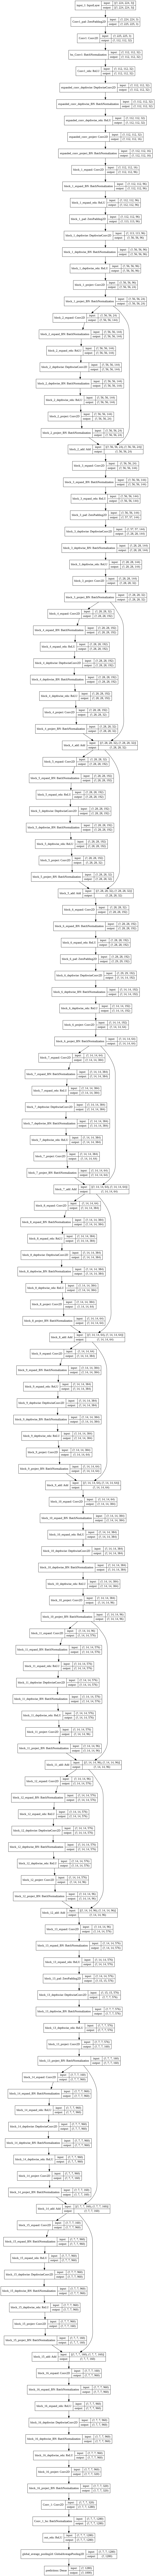

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

Wie Sie sehen, besteht das MobileNet aus sehr vielen Schichten. Neben verschiedenen anderen Schichttypen, deren Erklärung im Einzelnen den Rahmen dieses Kurses sprengen würde, sehen Sie, dass die ``Conv2d``-Schicht einer der Hauptbestandteile des Netzes ist. 

In der letzen Vorlesung haben wir auch schon gesehen, dass diese vortrainierten Netze sehr gut Bilder klassifizieren können, zumindest in den 1000 Kategorien, die im ImagenNet Trainingsdatensatz vorhanden sind.

Was machen wir aber, wenn wir Bilder mit Kategorien labeln wollen, die nicht in diesem Datensatz vorhanden waren? Natürlich haben wir die Möglichkeit solche Netzte komplett mit unseren Daten neu zu trainieren. Aber das hat zwei Haken:
- Wir brauchen viele Computerressourcen.
- Wir brauchen sehr viele Daten, denn je komplexer ein Netzwerk, desto mehr Daten werden für das Training benötigt.

Als Lösung bietet sich hier ``transfer-learning`` an (siehe auch Vorlesung 0): Wir trainieren nicht das ganze Netz neu, sondern gehen davon aus, dass das Netz gelernt hat, abstrakte Bildmerkmale zu extrahieren.

Somit müssen wir nur die letzte Schicht neu trainieren, um die richtigen Kombinationen der abstrakten Bildmerkmale unseren neuen Kategorien zuzuordnen.

### 2.4.0 Bildklassifikation: cats vs. dogs

#### Der Datensatz

Als Beispiel wollen wir das `MobileNet` dazu verwenden, Hunde- und Katzenbilder voneinander zu unterscheiden. Dazu müssen wir uns erstmal einen Datensatz erstellen:

- Laden Sie sich den folgenden Datensatz herunter (ca. 800MB): https://www.microsoft.com/en-us/download/details.aspx?id=54765
- Laden Sie davon 500 Katzen- und 500 Hundebilder in zwei seperate Ordner (z.B. `/Cat500` und `/Dog500`) in ihr Google-Drive hoch.
- Anschließend können Sie diese Bilder hier verwenden.


Wie zuvor muss wieder Ihr Google-Drive eingebunden werden:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Nun wollen wir die Bilder aus unserem Google-Drive laden. Hierfür benutzen wir das Modul `preprocessing` von `Keras`. 

In [ ]:
from tqdm import tqdm # tqdm gibt uns einen Fortschritsbalken
from tensorflow.keras import preprocessing # preprocessing funktionalität von keras
import glob # dateisystemfunktionalität


In [ ]:
# die Ordner, in denen die Bilder gespeichert sind.
cat_image_folder = './drive/My Drive/Cat500/'
dog_image_folder = './drive/My Drive/Dog500/'

In [ ]:
cat_images = [] # eine leere Liste zum Sammeln der Bilder 
# glob gibt alle Dateinamen in einem Ordner als Liste zurück
cat_files = glob.glob(cat_image_folder+'*') 
for cat_file in tqdm(cat_files):
    # das bild wird mit einer vorgegebenen größe geladen
    cat_image =  preprocessing.image.load_img(cat_file, target_size=(224,224))
    # ... und in einen Array umgewandelt.
    cat_image_array = preprocessing.image.img_to_array(cat_image)
    # das Bild wird an die Liste angehängt.
    cat_images.append(cat_image_array)
# Am Ende wird die Liste von bildern in einen Array umgewandelt
cat_images = np.array(cat_images) 

print(cat_images.shape)

Das gleiche Prozedere wenden wir dann auch auf die Hundebilder an.

In [ ]:
dog_images = []
dog_files = glob.glob(dog_image_folder+'*')
for dog_file in tqdm(dog_files):
    dog_image = preprocessing.image.load_img(dog_file, target_size=(224,224))
    dog_images.append(preprocessing.image.img_to_array(dog_image))
dog_images = np.array(dog_images)

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(preprocessing.image.array_to_img(cat_images[0]))

plt.subplot(122)
plt.imshow(preprocessing.image.array_to_img(dog_images[0]))

Bevor wir diese Bilder mit unserem Netz verarbeiten können, müssen wir wieder das netzspezifische Preprocessing anwenden (siehe Vorlesung 1).

In [ ]:
cat_image_inputs = mobilenet_v2.preprocess_input(cat_images)
dog_image_inputs = mobilenet_v2.preprocess_input(dog_images)

#### Das geänderte Modell

Um mit diesem Datensatz ein Modell zu trainieren, werden wir nun von unserem `MobileNet` die letzte Schicht entfernen (diese hat ja Bildmerkmale auf 1000 Kategorien gemappt) und durch eine neuen ersetzen, die unsere Bildmerkmale auf unsere zwei Kategorien mappt.

Zuerst laden wir das Netz nochmal und geben an `include_top=False`, d.h. wir wollen die ursprüngliche Ausgabeschicht nicht mitladen.

In [ ]:
base_model = mobilenet_v2.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights='imagenet'
)

In [ ]:
tf.keras.utils.plot_model(base_model, show_shapes=True)

Wenn Sie dieses Model mit dem vollen Model vergleichen, sehen Sie, dass nicht nur eine sondern die letzten zwei Schichten fehlen:
- Der GlobalAveragePooling2D Layer fehlt.
- Der logits:Dense Layer fehlt.
 Auf die technisches Gründe hierfür wollen wir an dieser Stelle nicht näher eingehen.

Diese beiden Schichten werden wir jetzt wieder hinzufügen. Statt der 1000 units im Ouput des ursprünglichen Modells benötigen wir aber nur eine Dense-Layer mit einer einzelnen Zelle (Katze oder nicht Katze aka Hund).

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(
    units=1, 
    activation='sigmoid', #Aktivierungsfunktion für binäre Klassifikationsprobleme 
    name='out'
)

Jetzt können wir unser Netz wieder zusammensetzen. Um von den vortrainierten Gewichten vpn `MobileNet`zu profitieren, müssen wir aber noch angeben, dass das Basismodell nicht mehr trainiert werden soll. Hierzu wird das Attribut `trainable` auf den Wert `False` gesetzt.

In [ ]:
base_model.trainable = False 

In [ ]:
new_model = tf.keras.Sequential()

new_model.add(base_model)
new_model.add(global_average_layer)
new_model.add(prediction_layer)

In [ ]:
tf.keras.utils.plot_model(new_model, show_shapes=True)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(
    optimizer='adam',            # bei tiefen Netzen häufig verwendeter Optimierungsalgorithmus
    loss='binary_crossentropy',  # bei Klassifikation mit zwei Klassen nehmen wir 'binary_crossentropy' als Fehlermaß
    metrics=['accuracy']         # zum Beobachten des Trainings wählen wir wieder die Accuracy
)

Und schon kann es fast mit dem Training losgehen, wir müssen nur noch unsere Hunde und Katzenbilder zu einem Trainingsdatensatz (und Testdatensatz) zusammenfügen.

In [ ]:
# Wir schmeißen die ersten 400 Katzen- und Hundebilder in einen Topf
train_images = np.vstack([cat_image_inputs[0:400], dog_image_inputs[0:400]])
# Jedem Katzenbild ordnen wir das Label 0 zu, jedem Hundebild das Label 1
train_labels = np.hstack([np.zeros(400), np.ones(400)])
print(train_images.shape)
print(train_labels.shape)

# und aus jeweils 50 Katzen- und Hundebildern bauen wir uns einen Testdatensatz
test_images = np.vstack([cat_image_inputs[400:500], dog_image_inputs[400:500]])
test_labels = np.hstack([np.zeros(100), np.ones(100)])

In [ ]:
new_model.fit(
    x = train_images,
    y = train_labels,
    shuffle=True, # wir durchmischen unsere Daten, damit nicht zuerst alle Katzen und dann alle Hunde kommen
    epochs=30,                                      
    validation_data = (test_images, test_labels)
)

Mit diesem Modell können wir nun auch wieder Vorhersagen machen. Wir erhalten dabei Werte zwischen 0 und 1, die für die Wahrscheinlicheit stehen, dass es sich um einen Hund handelt. Also werden wir alle Bilder mit einer Wahrscheinlichkeit > 0.5 als Hund, und alle anderen als Katze klassifizieren.

In [ ]:
prediction = new_model.predict(test_images)
prediction.squeeze()

In [ ]:
plt.figure(figsize = (20,20))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.imshow(preprocessing.image.array_to_img(test_images[2*i]))
    if prediction[2*i] < 0.5:
        label = 'Katze'
    else:
        label = 'Hund' 
    plt.title(label)
    plt.axis('off')

### 2.4.1 OPTIONAL: Weitere vortrainierte Netze

Wie Sie schon wissen, gibt es neben `MobileNet` weitere vortrainierte Netze im Modul `keras.applications`. Suchen sie sich eines dieser Netze aus und trainieren Sie auch dieses auf Hunde vs. Katzen nach (ohne das zugehörige Basisnetz erneut zu trainieren).

In [ ]:
# Lösung:

<bitte hier ausfüllen>

---



### 2.4.2 OPTIONAL: Ihr eigener Datensatz

Erstellen Sie einen Datensatz mit zwei Kategorien ihrer Wahl. Erzeugen Sie zwei Ordner in Ihrem Google-Drive analog zu den Ordnern der Hunde- und Katzenbilder. Trainieren Sie ein Netz zum Klassifizieren dieser Bilder nach. 

In [ ]:
# Lösung: